# INF-616 - Tarefa 1

Professor: Jacques Wainer -- wainer@ic.unicamp.br
Monitor: Lucas David -- ra188972@students.ic.unicamp.br

Instituto de Computação - Unicamp  
2018

In [3]:
#Alunos: Liselene Borges e Marcos Scarpim

## Classificação binária (decisão)

In [4]:
from __future__ import print_function

import numpy as np
import matplotlib

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

%matplotlib inline

In [5]:
seed = 42
test_size = 0.25

np.random.seed(seed)
dataset = load_breast_cancer()


def train_test_split(x, y, test_fraction=1 / 3):
    """Separa um conjunto de `len(x)` amostras em dois de
    tamanhos `len(x) * (1 - test_fraction)` e `len(x) * test_fraction`.
    """
    indices = np.arange(len(x))
    np.random.shuffle(indices)
    
    train_size = int(len(x) * (1 - test_fraction))
    train_samples = indices[:train_size]
    test_samples = indices[train_size:]
    
    return (x[train_samples], y[train_samples]), (x[test_samples], y[test_samples])


(x_train, y_train), (x_test, y_test) = train_test_split(dataset.data,
                                                        dataset.target,
                                                        test_size)

print('Conjunto "Breast Cancer Wisconsin (Diagnostic)""',
      '================================================\n',
      'Contém descrições dos núcleos das células aspiradas de tecido ',
      'mamário humano, classificadas em malignas e benignas.\n',
      sep='\n')

print('Amostras no conjunto original: ', len(dataset.data))
print('Amostras no conjunto de treino:', len(x_train))
print('Amostras no conjunto de teste: ', len(x_test))

Conjunto "Breast Cancer Wisconsin (Diagnostic)""

Contém descrições dos núcleos das células aspiradas de tecido 
mamário humano, classificadas em malignas e benignas.

Amostras no conjunto original:  569
Amostras no conjunto de treino: 426
Amostras no conjunto de teste:  143


### Inicialize e treine um classificador `SVC` e um `LogisticRegression`

Utilize as classes `sklearn.svm.SVC` e `sklearn.linear.LogisticRegression`

In [6]:
SVC_C            = 100
SVC_GAMMA        = 0.001
SVC_RANDOM_STATE = 13
LR_C             = 1000
LR_RANDOM_STATE  = 24

# Inicialize e treine os estimadores aqui:
svc = SVC(gamma=SVC_GAMMA, C=SVC_C, random_state=SVC_RANDOM_STATE)
svc.fit(x_train, y_train)
lr = LogisticRegression(random_state=LR_RANDOM_STATE, C=LR_C)
lr.fit(x_train, y_train)

estimators = [svc, lr]

### Qual dos dois estimadores apresenta maior acurácia sobre o conjunto WDBC teste?

In [7]:
for e in estimators:
    print('~> Teste do estimator', type(e).__name__)
    p_train = e.predict(x_train)
    
    print('   exemplo de rótulos de treino verdadeiros:', y_train[:10], '...')
    print('   exemplo de rótulos de treino preditos:', p_train[:10], '...')

    # Resposta:
    ypred=e.predict(x_test)
    acc = sum(ypred == y_test)/len(y_test)
    print('   Acurácia: ', acc)

~> Teste do estimator SVC
   exemplo de rótulos de treino verdadeiros: [1 0 0 1 1 0 0 0 1 1] ...
   exemplo de rótulos de treino preditos: [1 0 0 1 1 0 0 0 1 1] ...
   Acurácia:  0.8811188811188811
~> Teste do estimator LogisticRegression
   exemplo de rótulos de treino verdadeiros: [1 0 0 1 1 0 0 0 1 1] ...
   exemplo de rótulos de treino preditos: [1 0 0 1 1 0 0 0 1 1] ...
   Acurácia:  0.9300699300699301


### O *Support Vector Machine* Classifier consegue distinguir ambas as classes de forma satisfatória?

Utilize a matriz de confusão para descobrir se o SVC consegue efetivamente distinguir amostras benignas de malignas.

In [8]:
p_test = svc.predict(x_test)

# Resposta:
cm = confusion_matrix(y_test, p_test)
print(cm)
# Sim. Uma vez que de 54 amostras malignas, 49 foram classificadas corretamente.
# E das 89 amostras benignas, 77 foram classificadas corretamente.

[[49 12]
 [ 5 77]]


### Calcule manualmente (sem o auxílio do `scikit.metrics`) as métricas acurácia balanceada, precision, *recall* e *F1*

In [13]:
for e in estimators:
    print('~> Estimador', type(e).__name__)
    p_test = e.predict(x_test)
    # Resposta:
    cm = confusion_matrix(y_test, p_test)
    acc = sum(y_test == p_test)/len(p_test) 
    p = cm[0,0]/(cm[0,0] + cm[1,0])
    r = cm[0,0]/(cm[0,0] + cm[0,1])
    f1 = (2*p*r)/(p+r)
    print('    acuracia:', acc)
    print('   precision:', p)
    print('      recall:', r)
    print('          f1:', f1)

~> Estimador SVC
    acuracia: 0.8811188811188811
   precision: 0.9074074074074074
      recall: 0.8032786885245902
          f1: 0.8521739130434782
~> Estimador LogisticRegression
    acuracia: 0.9300699300699301
   precision: 0.9322033898305084
      recall: 0.9016393442622951
          f1: 0.9166666666666666


### Recalcule as medidas anteriores e a curva ROC AUC com o auxílio do scikit-learn

~> Estimador SVC
Accuracy: 0.8811188811188811
Precision: 0.8651685393258427
Recall: 0.9390243902439024
F1: 0.9005847953216373


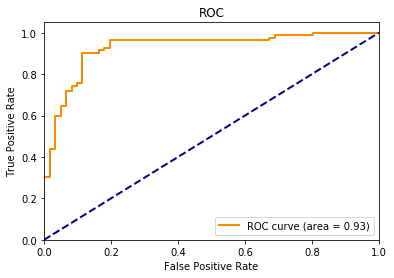

In [18]:
print('~> Estimador', type(svc).__name__)
p_test = svc.predict(x_test)
s_test = svc.decision_function(x_test)

# Resposta:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test, p_test)
print("Accuracy:",a)

from sklearn.metrics import precision_score
p=precision_score(y_test,p_test)
print("Precision:",p)

from sklearn.metrics import recall_score
r=recall_score(y_test,p_test)
print("Recall:",r)

from sklearn.metrics import f1_score
f=f1_score(y_test,p_test)
print("F1:",f)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, s_test)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

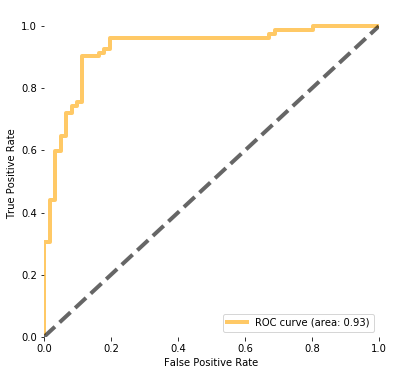

In [11]:
def display_roc_curve(y, s):
    """Exibe a curva ROC AUC em um grafico.
    Originalmente implementado em: http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
    """
    fpr, tpr, _ = metrics.roc_curve(y, s)
    roc_auc = metrics.auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='orange', lw=4, alpha=.6, label='ROC curve (area: %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='black', lw=4, alpha=0.6, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    [spine.set_visible(False) for spine in plt.gca().spines.values()]


display_roc_curve(y_test, s_test)

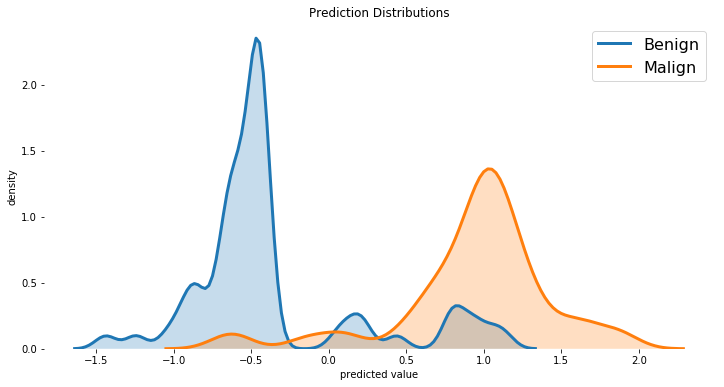

In [12]:
def display_predictions(y, s):
    """Exibe a distribuicao das predicoes de ambas classes + e -.
    """
    # Originally implemented at: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

    plt.figure(figsize=(12, 6))

    sns.distplot(s[~y.astype(bool)], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3}, label='Benign')
    sns.distplot(s[y.astype(bool)], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3}, label='Malign')

    plt.title('Prediction Distributions')
    plt.xlabel('predicted value')
    plt.ylabel('density')
    plt.legend(prop={'size': 16}, loc='upper right')
    [spine.set_visible(False) for spine in plt.gca().spines.values()]
    

display_predictions(y_test, s_test)